# Проверка бандла в Microsoft Word

Загрузим Data Bundle

In [22]:
from tg.common import DataBundle

db = DataBundle.load(r'../demos/files/tsa-test.zip')

src = db.src
src.head()

,word_id,sentence_id,word_index,paragraph_id,word_tail,word,word_type,word_length,file_id,corpus_id,is_target,label,original_corpus,original_word_id,original_sentence_id,original_paragraph_id,updated
0,0,0,0,0,1,—,punct,1,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,False,0,pub.base.zip,68,4,2,False
1,1,0,1,0,1,Фильм,ru,5,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,False,0,pub.base.zip,69,4,2,False
2,2,0,2,0,0,«,punct,1,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,False,0,pub.base.zip,70,4,2,False
3,3,0,3,0,0,Растворяться,ru,12,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,True,0,pub.base.zip,71,4,2,False
4,4,0,4,0,1,»,punct,1,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,False,0,pub.base.zip,72,4,2,False


Подключим клиент для работы с MS Word

In [21]:
from qa.enums.language import Language
from word_client import MSWordClient

client = MSWordClient(Language.RUSSIAN)

client.spell_check("Мне часто приходится боротся с трудностями")

[SpellError(word='боротся', index=3, start_position=21, end_position=28, suggestions=['борется', 'борются', 'бороться', 'берётся', 'берется', 'берутся', 'бурится', 'бурятся', 'боролся', 'боротая'])]

Получим список случайных идентификаторов предложений

In [3]:
import numpy as np


ALL_SENTENCES_COUNT = 500
NEGATIVE_SENTENCES_COUNT = 300

uniq_sentence_ids = np.random.choice(src['sentence_id'].unique(), ALL_SENTENCES_COUNT, replace=False)

Получим dataframe с корректными предложениями

In [4]:
positive_sentence_ids = uniq_sentence_ids[NEGATIVE_SENTENCES_COUNT:]

positive_src = src[src['sentence_id'].isin(positive_sentence_ids)]

positive_src.head()

,word_id,sentence_id,word_index,paragraph_id,word_tail,word,word_type,word_length,file_id,corpus_id,is_target,label,original_corpus,original_word_id,original_sentence_id,original_paragraph_id,updated
115,115,76,0,76,1,—,punct,1,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,False,1,pub.base.zip,777,59,34,False
116,116,76,1,76,1,В,ru,1,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,False,1,pub.base.zip,778,59,34,False
117,117,76,2,76,0,«,punct,1,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,False,1,pub.base.zip,779,59,34,False
118,118,76,3,76,0,Растворятся,ru,12,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,True,1,pub.base.zip,780,59,34,False
119,119,76,4,76,1,»,punct,1,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,False,1,pub.base.zip,781,59,34,False


Получим отрицательный dataframe с предложениями, где правильные глаголы на -тся/-ться заменены на ошибочные

In [5]:
negative_sentence_ids = uniq_sentence_ids[:NEGATIVE_SENTENCES_COUNT]
negative_src = src[src['sentence_id'].isin(negative_sentence_ids)]

def replace_endings(word):
    if word.endswith('тся'):
        return word[:-3] + 'ться'
    elif word.endswith('ться'):
        return word[:-4] + 'тся'
    else:
        return word

negative_src = negative_src.copy()
negative_src['word'] = negative_src['word'].apply(replace_endings)

negative_src.head()

,word_id,sentence_id,word_index,paragraph_id,word_tail,word,word_type,word_length,file_id,corpus_id,is_target,label,original_corpus,original_word_id,original_sentence_id,original_paragraph_id,updated
27,27,2,0,2,0,Думаю,ru,5,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,False,0,pub.base.zip,408,27,14,False
28,28,2,1,2,1,",",punct,1,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,False,0,pub.base.zip,409,27,14,False
29,29,2,2,2,1,что,ru,3,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,False,0,pub.base.zip,410,27,14,False
30,30,2,3,2,0,зрителю,ru,7,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,False,0,pub.base.zip,411,27,14,False
31,31,2,4,2,1,",",punct,1,273a88ef-0d47-4a69-8c84-9b91e2d5427f,transfuzed.zip,False,0,pub.base.zip,412,27,14,False


In [8]:
from pandas import DataFrame

from tg.grammar_ru import Separator
from qa.entities.error_qualifier import TsaErrorQualifier


def get_errors_count(df: DataFrame) -> int:
    errors_count = 0

    for id in df['sentence_id'].unique():
        sentence = Separator.Viewer().to_text(df.loc[df.sentence_id == id])
        errors_count += len(client.spell_check(sentence, error_qualifier=TsaErrorQualifier))

    return errors_count

Получим число ошибок употребления -тся/-ться, которое найдет MS Word в предложениях из позитивного dataframe

In [9]:
positive_errors_count = get_errors_count(positive_src)
positive_errors_count

0

Получим число ошибок употребления -тся/-ться, которое найдет MS Word в предложениях из отрицательного dataframe

In [10]:
negative_errors_count = get_errors_count(negative_src)
negative_errors_count

68

In [11]:
true_positive = negative_errors_count # ошибка есть и она найдена
false_positive = positive_errors_count # ошибки нет, но она найдена
true_negative = positive_src[positive_src['is_target'] == True].shape[0] - positive_errors_count # ошибки нет и она не найдена
false_negative = negative_src[negative_src['is_target'] == True].shape[0] - negative_errors_count # ошибка есть, но она не найдена

true_positive, false_positive, true_negative, false_negative

(68, 0, 200, 236)

Построим матрицу ошибок

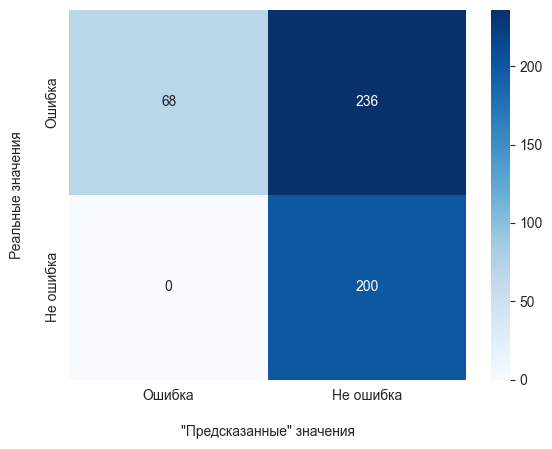

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.subplot()
sns.heatmap([[true_positive, false_negative], [false_positive, true_negative]], annot=True, cmap='Blues', ax=ax, fmt='g')

ax.set_xlabel('\n"Предсказанные" значения')
ax.set_ylabel('Реальные значения\n')


ax.xaxis.set_ticklabels(['Ошибка', 'Не ошибка'])
ax.yaxis.set_ticklabels(['Ошибка', 'Не ошибка'])

plt.show()

Посчитаем точность

In [12]:
precision = true_positive / (true_positive + false_positive)

precision

1.0

Посчитаем полноту

In [13]:
recall = true_positive / (true_positive + false_negative)

recall

0.2236842105263158

Посчитаем f1

In [14]:
f1_score = 2 * precision * recall / (recall + precision)

f1_score

0.3655913978494624